##3.2 Changing view angles
Here we will experiment with different sun and viewing angles using a couple of birch trees

In [1]:
import os
import numpy as np
from run_start import *
from hips2img import *
%matplotlib inline

##Changing view angle in <code><span style="background-color:lightgrey">camera.dat</span></code>
Options that were changed to create the following example are:

<code>geometry.zenith</code> in the below example this has been modified to 70$^{\circ}$.

<code>geometry.lookAt</code> changes the centre of the image, here this has been changed to <code>[0, 3, 1.5]</code> (x, y, z)

<code>results.image</code> and <code>result.integral</code> were also updated to prevent previous experiments being over written

start:

	VERBOSE flag on (-v option)

read_spectral_file:	4 data entries read in file wb/waveband.dat

camera simple camera: at 0.000000 -6.396926 4.920201 focalLength: 0.400000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 0.000000 azimuth 0.000000 twist 0.000000

(100.00)


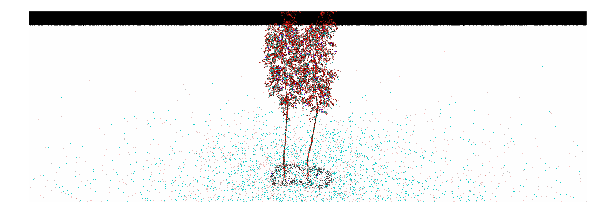

In [2]:
cmd = "echo 14 camera/camera_birches.dat light/light.dat | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/a_pair_of_birch_trees.obj"
error = run_start(cmd)

if not error:
    # here we create a false colour NIR image by reordering the bands, stretch is
    # therefore also turned off.
    hips2img('output/2birches.hips', stretch=False, order=[3, 1, 2])

##Changing view angle in <code><span style="background-color:lightgrey">light.dat</span></code>

To change the light source geometry you need to change the <code>geometry.zenith</code> in this case to 45$^{\circ}$

##Creating a brdf plot
Warning: this takes a while to run

Here we are going to create a Python loop that changes the value in the camera file

In [31]:
camera_temp = open('camera_brdf.dat').read()
camera_temp = camera_temp.format(1)
with open('camera_temp.dat', 'w') as o: o.write(camera_temp)

start:

	VERBOSE flag on (-v option)

read_spectral_file:	1 data entries read in file wb/waveband_single.dat

camera simple camera: at 0.200000 -7.660444 11.786453 focalLength: 10.000000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 45.000000 azimuth 0.000000 twist 0.000000

(100.00)


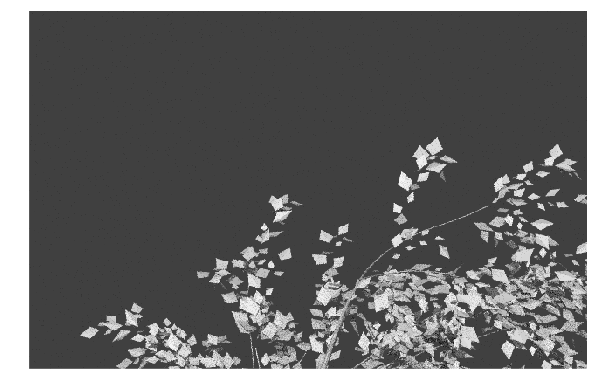

start:

	VERBOSE flag on (-v option)

read_spectral_file:	1 data entries read in file wb/waveband_single.dat

camera simple camera: at 0.200000 -4.226183 14.421655 focalLength: 10.000000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 45.000000 azimuth 0.000000 twist 0.000000

(100.00)


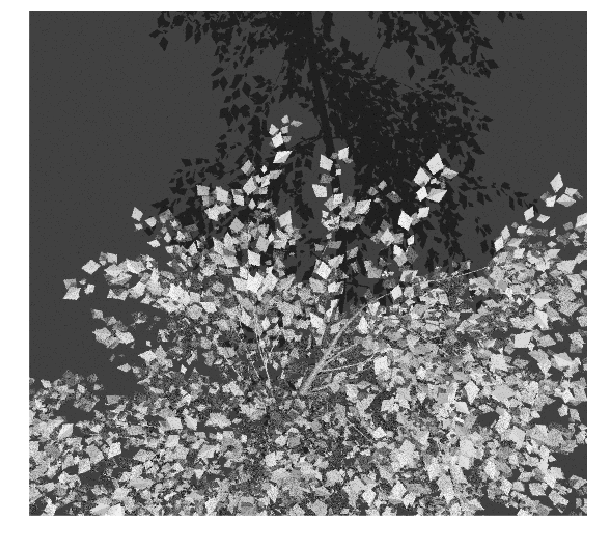

start:

	VERBOSE flag on (-v option)

read_spectral_file:	1 data entries read in file wb/waveband_single.dat

camera simple camera: at 0.200000 0.000000 15.358577 focalLength: 10.000000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 45.000000 azimuth 0.000000 twist 0.000000

(100.00)


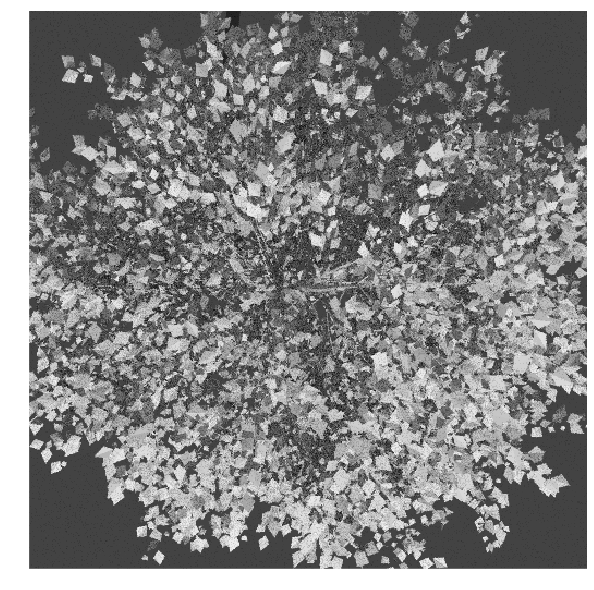

In [16]:
for i, azimuth in enumerate(np.arange(0, 360, 40)):
    
    for j, zenith in enumerate(-np.arange(-50, 25, 25)):
        
        # alter camera file
        camera_temp = open('camera/camera_brdf.dat').read()
        with open('camera/camera.temp', 'w') as o:
            o.write(camera_temp % {'azi':azimuth, 'zen':zenith})
            
        # run simulation
        cmd = "echo 14 camera/camera.temp light/brdf_light.dat | \
               start -v -RATm 5 -RATsensor_wavebands wb/waveband_single.dat \
               obj/birch_tree_scene.obj"
        error = run_start(cmd)
        hips2img('output/brdf.temp.hips', stretch=False, order=[0])
    
    if j == 2: break

In [33]:
with open('camera.temp', 'w') as o:
    o.write(camera_temp % {'azi':10, 'zen':3})

In [9]:
C =  camera_brdf.camera().split(';')
C.pop('\t')

TypeError: an integer is required